In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar, brute, dual_annealing
import pygad
from importlib import reload
from IPython.display import clear_output
import os

import tgs 
import rgs 
import key_rate_optimization as opt

reload(tgs)
reload(rgs)
reload(opt)

<module 'key_rate_optimization' from '/Users/gordonwongyl/Documents/ORF/Reproduce_result/key_rate_optimization.py'>

In [45]:
# Set the paramaters for optimization
# Values in Table 2
GAMMA = np.array([2e9, 100e9, 170e6, 100e9]) * 2 * np.pi
T_SPIN_COHERENCE = [13e-3, 4e-6, 1., 1.]

best_solutions_list = []
best_solutions_fitness_list = []

for loop_in in range(4):
    for iter in range(3):
        # rout = opt.tgs_f_routine(1000e3, GAMMA[loop_in], T_SPIN_COHERENCE[loop_in])
        rout = opt.rgs_a_routine(1000e3, GAMMA[loop_in], T_SPIN_COHERENCE[loop_in])
        num_generations = 20
        num_parents_mating = 4

        fitness_function = rout.fitness_function_GA

        sol_per_pop = 60 # number of solutions within the population (initially)
        num_genes = 4 # the function inputs
        gene_type = [int, int, int, float] # input type
        # gene_space = [range(1, 11), range(1, 30), range(1, 30), {"low": 1., "high": 2000.}]  # specify the possible values for each gene
        gene_space = [range(1, 30), range(1, 20), range(1, 50), {"low": 1., "high": 2000.}]  # specify the possible values for each gene

        init_range_low = 1
        init_range_high = 10

        parent_selection_type = "sss"
        keep_parents = -1 # Number of parents to keep in the current population
        keep_elitism = 1 # only the best solution in the current generation is kept in the next generation.

        crossover_type = "single_point" 
        mutation_type = "random"
        mutation_percent_genes = 25.
        parallel_processing = ["process", 0]


        rout.ga_instance = pygad.GA(num_generations=num_generations,
                                num_parents_mating=num_parents_mating,
                                fitness_func=fitness_function,
                                sol_per_pop=sol_per_pop,
                                num_genes=num_genes,
                                gene_type=gene_type,
                                gene_space=gene_space,
                                init_range_low=init_range_low,
                                init_range_high=init_range_high,
                                parent_selection_type=parent_selection_type,
                                keep_parents=keep_parents,
                                keep_elitism=keep_elitism,
                                crossover_type=crossover_type,
                                mutation_type=mutation_type,
                                mutation_percent_genes=mutation_percent_genes, 
                                on_generation=rout.on_gen, 
                                on_fitness=rout.on_fitness, parallel_processing=parallel_processing, stop_criteria="saturate_5")
        rout.ga_instance.run()
        best_solutions_fitness_list.append(rout.ga_instance.best_solutions_fitness)
        best_solutions_list.append(rout.ga_instance.best_solution()[0])
        filename = "optimized_result/" + f"rgs_a_gamma_{GAMMA[loop_in]}_spin_coh_{T_SPIN_COHERENCE[loop_in]}_L_{1000e3}_iter_{iter+1}"
        rout.ga_instance.save(filename)


Generation :  19
Current best solution: [24 7 32 245.08151276568435]


/Users/gordonwongyl/Documents/ORF/Reproduce_result/tgs.py:319: RuntimeWarning: invalid value encountered in log2
  return  - x*np.log2(x) - (1-x)*np.log2(1-x)
/var/folders/5m/d9qdltz940j7ch1nc4sgtqf00000gn/T/ipykernel_34924/2694758079.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


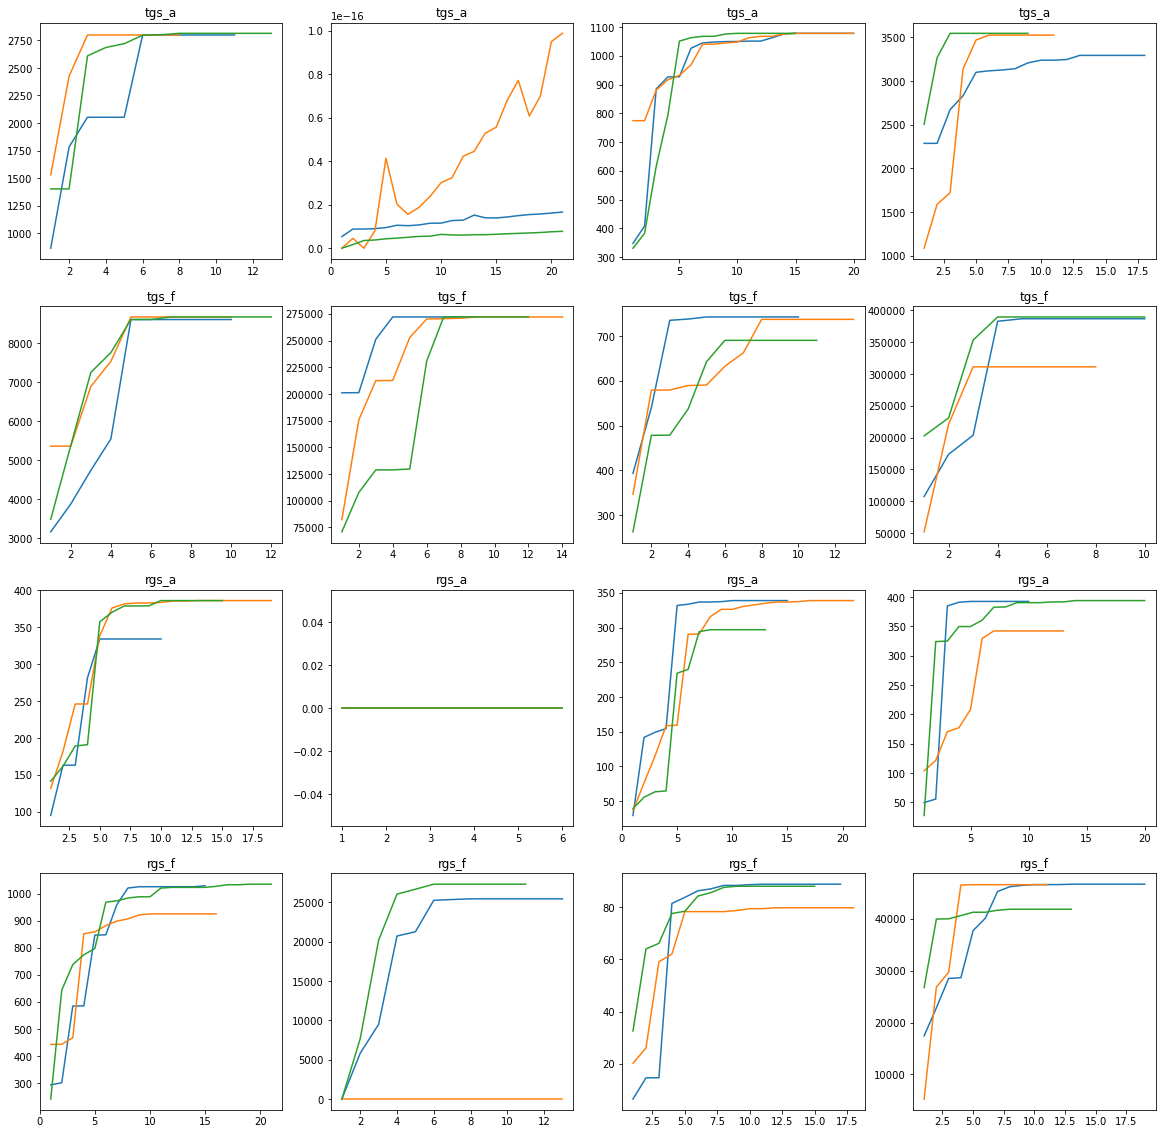

In [63]:
fig, ax = plt.subplots(4, 4, figsize=(20, 20))
scheme_list = ["tgs_a", "tgs_f", "rgs_a", "rgs_f"]

for name_in in range(4):
    name = scheme_list[name_in]
    for param_in in range(4):
        for iter in range(3):   
            ga_instance = pygad.load("optimized_result/" + name + f"_gamma_{GAMMA[param_in]}_spin_coh_{T_SPIN_COHERENCE[param_in]}_L_{1000e3}_iter_{iter+1}")
            y_data = ga_instance.best_solutions_fitness
            x_data = list(range(1, len(y_data)+1))
            ax[name_in][param_in].plot(x_data, y_data, label=f"{iter+1}. {ga_instance.best_solution()[0][:-1]}")
            ax[name_in][param_in].set_title(name)
            ax.legend()
fig.show()

In [69]:
for name_in in range(4):
    name = scheme_list[name_in]
    for param_in in range(4):
        for iter in range(3):   
            ax[name_in][param_in].legend()
fig.savefig('output.png', facecolor='white')